# Exercise 6.9

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0)

In [2]:
class WindyGrid():
	
	def __init__(self, height, width, wind, start, goal):
		self.height = height
		self.width = width
		self.wind = wind
		self.start = start
		self.goal = goal
	
	def getStartState(self):
		return self.start
	
	def getActions(self, state):
		moves = [(x,y) for x in range(-1,2) for y in range(-1,2) if (x,y) != (0,0)]
		return moves

	def transition(self, state, action):
		# Returns: next_state, reward, terminal
		x, y = state
		x_move, y_move = action

		y = y + y_move
		y = max(0, min(y, self.height-1))
		y += self.wind[x]
		y = max(0, min(y, self.height-1))

		x = x + x_move
		x = max(0, min(x, self.width-1))		
	
		return (x, y), -1, (x, y) == self.goal

In [3]:
class Sarsa():
	def __init__(self, actionFunction, epsilon, alpha, gamma):
		self.actionFunction = actionFunction
		self.epsilon = epsilon
		self.alpha = alpha
		self.gamma = gamma
		self.Q = {}

	def getQValue(self, state, action):
		if (state, action) not in self.Q:
			for a in self.actionFunction(state):
				self.Q[(state, a)] = 0.0
		return self.Q[(state, action)]
	
	def getPolicy(self, state):
		actions = self.actionFunction(state)
		return max(actions, key=lambda a: self.getQValue(state, a))
	
	def getAction(self, state):
		if random.random() < self.epsilon:
			return random.choice(self.actionFunction(state))
		else:
			return self.getPolicy(state)
		
	def update(self, state, action, reward, nextState, nextAction):
		# Q(s, a) = Q(s, a) + alpha * (reward + gamma * Q(s', a') - Q(s, a))
		self.Q[(state, action)] = self.getQValue(state, action) + self.alpha * (reward + self.gamma * self.getQValue(nextState, nextAction) - self.getQValue(state, action))

	

In [4]:
def train(mdp, sarsa, episodes):
	time_steps = []
	for i in range(episodes):
		state = mdp.getStartState()
		action = sarsa.getAction(state)
		terminal = False
		while not terminal:
			nextState, reward, terminal = mdp.transition(state, action)
			nextAction = sarsa.getAction(nextState)
			sarsa.update(state, action, reward, nextState, nextAction)
			state = nextState
			action = nextAction
			time_steps.append(i)
	return time_steps

In [5]:
windy_grid = WindyGrid(7, 10, [0,0,0,1,1,1,2,2,1,0], (0,3), (7,3))
sarsa = Sarsa(windy_grid.getActions, 0.2, 0.5, 1)

In [6]:
time_steps = train(windy_grid, sarsa, 50000)

In [7]:
def plot_episode_timesteps(time_steps):
	plt.plot(time_steps)
	plt.xlabel('Episodes')
	plt.ylabel('Time steps')
	plt.show()

In [8]:
def plot_policy(mdp, sarsa):
	qs = np.zeros((mdp.width, mdp.height))
	fig, ax = plt.subplots()
	for x in range(mdp.width):
		for y in range(mdp.height):
			policy = sarsa.getPolicy((x, y))
	
			qs[x, y] = sarsa.getQValue((x,y), policy)
			dx, dy = policy
			if qs[x, y] != 0:
				ax.arrow(x - 0.2 * dx, y - 0.2 * dy, 0.2 * dx, 0.2 * dy, width=0.05, head_width=0.2, head_length=0.2, color='blue')

	cax = ax.imshow(qs.T, interpolation='nearest', origin='lower')
	fig.colorbar(cax, ax=ax, label='Q-value')	
	plt.show()

In [9]:
def plot_trajectory(mdp, sarsa):
	state = mdp.getStartState()
	trajectory = [state]
	actions = []
	terminal = False
	while not terminal:
		action = sarsa.getPolicy(state)
		nextState, reward, terminal = mdp.transition(state, action)
		trajectory.append(nextState)
		actions.append(action)
		state = nextState

	qs = np.zeros((mdp.width, mdp.height))
	fig, ax = plt.subplots()
	for x in range(mdp.width):
		for y in range(mdp.height):
			policy = sarsa.getPolicy((x, y))
	
			qs[x, y] = sarsa.getQValue((x,y), policy)
	for i in range(len(trajectory) - 1):
		x0, y0 = trajectory[i]
		x1, y1 = trajectory[i+1]
		ax.arrow(x0, y0, x1 - x0, y1 - y0, width=0.05, head_width=0.2, head_length=0.2, color='blue')
		ax.arrow(x0, y0, actions[i][0] * 0.1, actions[i][1] * 0.1, width=0.03, head_width=0.2, head_length=0.2, color='red')
		
	cax = ax.imshow(qs.T, interpolation='nearest', origin='lower')
	fig.colorbar(cax, ax=ax, label='Q-value')		
	plt.show()

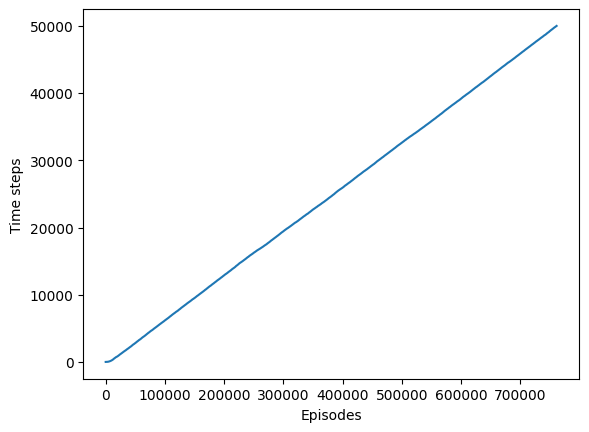

In [10]:
plot_episode_timesteps(time_steps)

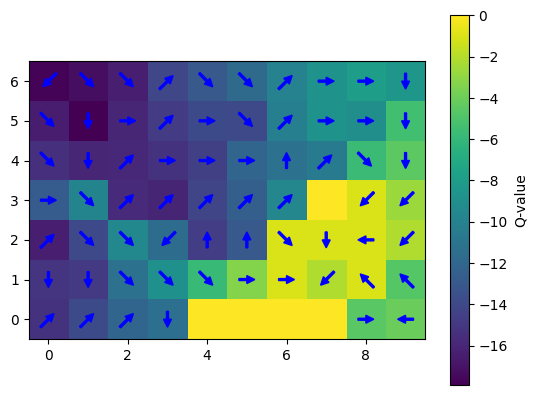

In [11]:
plot_policy(windy_grid, sarsa)

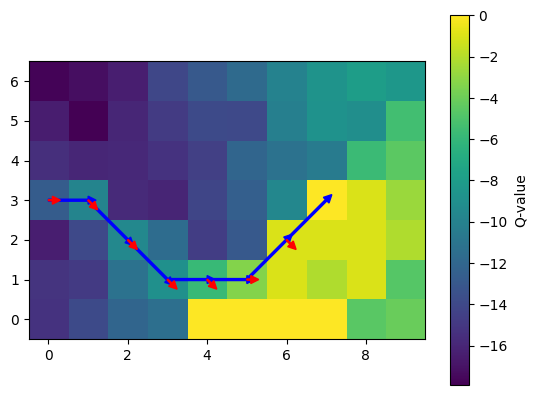

In [12]:
plot_trajectory(windy_grid, sarsa)

## With no-move action added

In [13]:
class WindyGridNoMove(WindyGrid):
	def getActions(self, state):
		return super().getActions(state) + [(0,0)]

In [14]:
windy_grid_no_move = WindyGridNoMove(7, 10, [0,0,0,1,1,1,2,2,1,0], (0,3), (7,3))
sarsa = Sarsa(windy_grid_no_move.getActions, 0.2, 0.2, 1)
time_steps = train(windy_grid_no_move, sarsa, 50000)

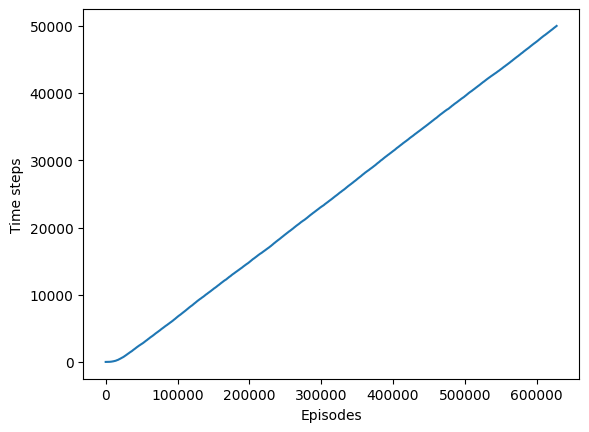

In [15]:
plot_episode_timesteps(time_steps)

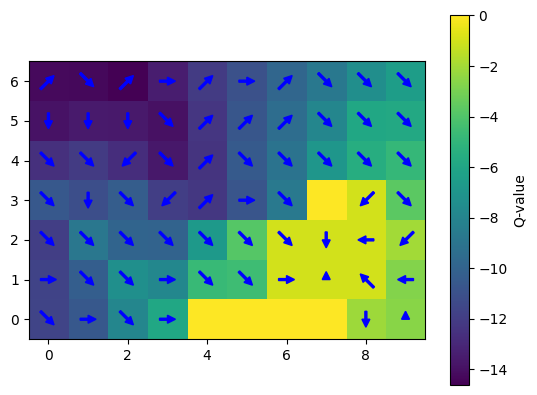

In [16]:
plot_policy(windy_grid_no_move, sarsa)

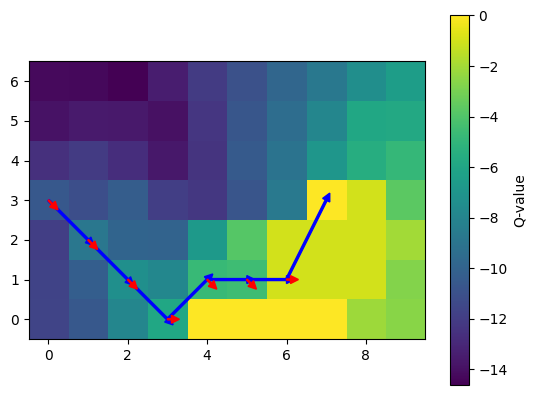

In [17]:
plot_trajectory(windy_grid_no_move, sarsa)